## GBM (Gradient Boosting Machine) : 그래디언트 부스트

부스팅 (Boosting)  
- boost : 밀어 올림, 강화   
- 머신러닝에서의 부스팅  
  - 약한 모델을 여러 번 순차적으로 적용해서 강한 모델로 만들어 간다는 의미  
  - 여러 개의 분류기가 순차적으로 학습을 수행하되 
  - 이전 학습기가 잘못 예측한 데이터를 다음 학습기가 학습하여 순차적으로 예측 정확도를 높이는 결과  
  - 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록  
    - 다음 분류기에게는 가중치(weight)를 부여하면서  
    - 학습과 예측을 진행  
  - 예측 성능이 뛰어나 앙상블 학습 주도  

---
- 여러 개의 약한 학습기(weak learner)를 순차적으로 학습/예측하면서  
- 잘못 예측된 데이터에 가중치(weight) 부여를 통해  
- 오류를 개선해 나가면서 학습하는 방식  

대표적 부스팅 알고리즘  
- GBM (Gradient Boosting Machine) : 그래디언트 부스트 
- AdaBoost(Adaptive Boosting) : 에이다 부스트  

에이다 부스트의 학습/예측 과정  
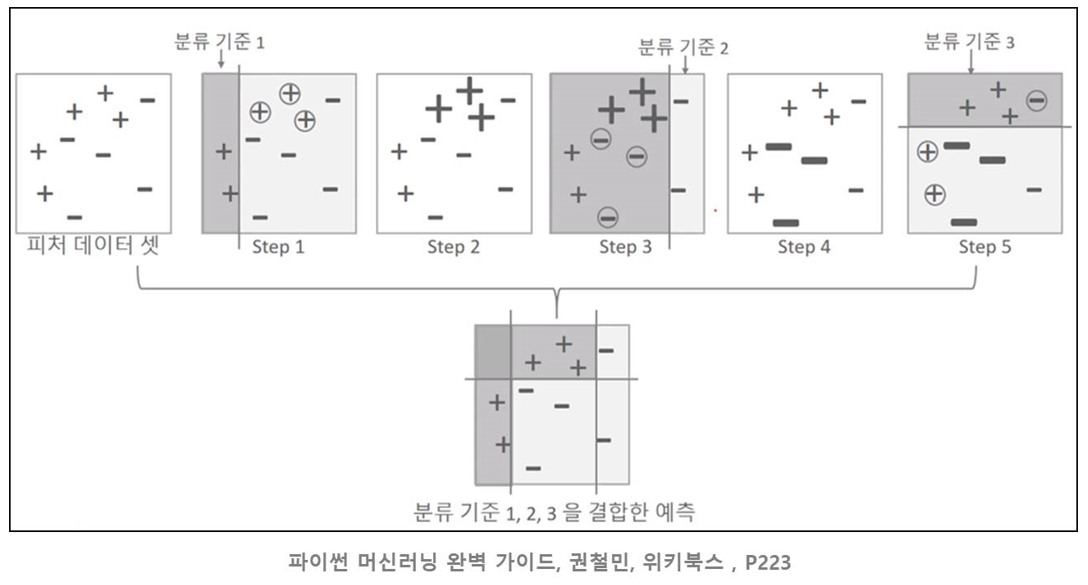

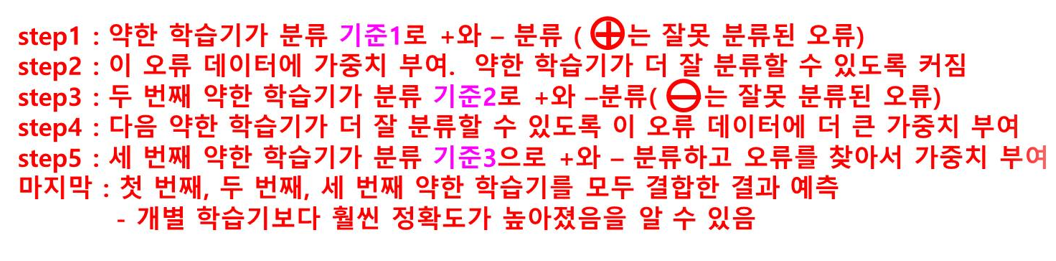

GBM (Gradient Boosting Machine) : 그래디언트 부스트  
- 에이다 부스트와 유사하지만  
- 가중치 업데이트를 경사 하강법을 이용하는 것이 큰 차이  
    - 반복 수행을 통해 오류를 최소화할 수있도록  
    - 가중치의 업데이트 값을 도출  
    - 오류값 = 실제값 - 예측값  
- 분류와 회귀 둘 다 가능  

경사 하강법 (Gradient Descent)
- 함수의 기울기(경사)를 구하고 경사의 절대값이 낮은 쪽으로 계속 이동시켜 극값에 이를 때까지 반복하면서
- 제시된 함수의 기울기로 최소값을 찾아내는 머신러닝 알고리즘 
- 손실 함수 : 예측값과 실제값의 차이(loss)를 측정하는 함수
- 손실 함수의 값이 최대한 작아지도록 파라미터를 조정
- 즉, 손실 함수의 최소값을 찾기 위해, 기울기가 최소가 되는 지점을 찾아가는 것 (미분값이 0이 되는 지점)
- 머신러닝 알고리즘은 손실 함수의 값을 최소화하는 방향으로 학습하는 것이 목표    


GBM 예제  
- GBM을 이용해 사용자 행동 데이터 세트로 예측 분류 수행  
- GBM 학습하는 시간이 얼마나걸리는지 GBM 수행 시간 측정  
- 사이킷런의 GradientBoostingClassifier 클래스 사용  

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
import pandas as pd

# 데이터 세트 읽어오기
X_train = pd.read_csv('../../data/human_X_train.csv')
X_test = pd.read_csv('../../data/human_X_test.csv')
y_train = pd.read_csv('../../data/y_train.txt', sep='\s+',header=None,names=['action'])
y_test = pd.read_csv('../../data/y_test.txt',sep='\s+',header=None,names=['action'])

# 구분자 : sep='\s+'
# 길이가 정해지지 않은 공백이 구분자인 경우에는 \s+ 정규식(regular expression) 문자열 사용
# \s : 공백
# \S : 공백이 아닌 문자열
# * : 0회 이상 반복
# + : 1회 이상 반복

In [6]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import time

# GBM 수행 시간 측정 : 시작 시간 설정
start_time = time.time()

# 모델 생성/학습/예측/평가
gbm_clf = GradientBoostingClassifier(random_state=0)
gbm_clf.fit(X_train, y_train)
y_pred = gbm_clf.predict(X_test)
gbm_accuracy = accuracy_score(y_test, y_pred)

# GBM 정확도
gbm_accuracy

# GBM 수행 시간
print(time.time() - start_time)

# 일반적으로 GBM이 랜덤 포레스트 보다 예측 성능이 조금 뛰어난 경우가 많음
# 문제 : 시간 오래 걸림, 하이퍼 파라미터 튜닝 노력도 더 필요하다는 것
# 대용량의 경우 학습에 매우 많은 시간이 소요

# 반면 램덤 포레스트의 경우
# 상대적으로 빠른 수행 시간을 보장해주므로
# 좀 더 쉽게 예측 결과 도출할 수 있음
# 그래서 프로젝트 진행할 때 
# 먼저 랜덤 포레스트 적용해서 성능 확인하고
# XGBoost 또는 LightGBM 사용해서 결과 비교
# 상황에 따라서는 stacking도 적용

# 

/Users/jeong_ahn/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(random_state=0)

0.9385816084153377

882.5703527927399


### GBM 하이퍼 파라미터 및 튜닝

GBM 주요 하이퍼 파라미터  

loss : 경사 하강법에서 사용할 비용 함수 지정. 기본값은 'deviance'(편차)    
    
n_estimators : weak learner의 개수. 기본값 100  
- weak learner가 순차적으로 오류를 보정하므로  
- 개수가 많을수록 예측 성능이 일정 수준까지 좋아질 수 있음  
- 그러나 개수가 많을 수록 시간이 오래 걸림  

learning_rate : GBM이 학습을 진행할 때마다 적용하는 학습률  
- weak learner가 순차적으로 오류값을 보정해 나가는 데 적용하는 계수  
- 0 ~ 1 사이의 값 지정 (기본값 0.1)  
- 작은 값을 적용하면 업데이트 되는 값이 작아져서  
    - 최소 오류 값을 찾아 예측 성능이 높아질 가능성은 높지만  
    - 많은 weak learner의 순차적인 반복 작업에 수행 시간이 오래 걸림  
- 너무 작게 설정하면 모든 weak learner의 반복이 완료돼도  
    - 최소 오류값을 찾지 못할 수도 있음  
- 반대로 큰 값을 적용하면   
    - 최소 오류값을 찾지 못하고 그냥 지나쳐 버려  
    - 예측 성능이 떨어질 가능성이 높아지지만  
    - 빠른 수행은 가능  

subsample : weak learner가 학습에 사용하는 데이터의 샘플링 비율  
- 기본값 1 : 전체 학습 데이터를 기반으로 학습한다는 의미  
- 0.5 : 학습 데이터의 50%  
- 과적합이 염려되는 경우 1보다 작은 값으로 설정  

In [1]:
# GridSearchCV 이용해서 하이퍼 파라미터 최적화
# 사용자 행동 데이터 세트 정도의 데이터 양에
# 많은 하이퍼 파라미터로 튜닝하게 되면 시간이 상당히 오래 걸림
# 간략하게 n_estimators와 learning_rate만 적용

# from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' :[100, 500],
    'learning_rate' :[0.05, 0.1]
}

grid_cv = GridSearchCV(gbm_clf, param_grid=params, cv=2, verbose=1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터 : \n', grid_cv.besst_params_)
print('최고 예측 정확도 : {0:.4f}'.format(grid_cv.best_score_))


# 실행 시간이 20분 ~ 1시간 소요될 것임


In [5]:
# GridSearchCV를 이용해서 최적으로 학습된 estimator로
# 테스트 데이터 세트에 적용해서 예측 수행
grid_cv_pred = grid_cv.best_estimator_.predict(X_test)
grid_cv_accuracy = accuracy_score(y_test, grid_cv_pred )

print('GBM 최종 정확도 : {0:.4F}'.format(grid_cv_accuracy))

GBM은 수행 시간이 오래 걸린다는 단점이 있지만  
과적합에도 강해서 예측 성능이 뛰어난 알고리즘  
많은 알고리즘이 GBM을 기반으로 해서 새롭게 만들어 지고 있음  

